<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/455_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.missourieconomy.org/indicators/cost_of_living/

https://www.numbeo.com/cost-of-living/region_rankings.jsp?title=2018&region=019

https://www.missourieconomy.org/indicators/cost_of_living/col4qu2000.stm

https://www.paycor.com/resource-center/minimum-wage-by-state-and-2018-increases

https://inkplant.com/code/state-latitudes-longitudes

In [1]:
!pip install geopandas
!pip install descartes
!pip install mapclassify

     |████████████████████████████████| 901kB 2.7MB/s 
     |████████████████████████████████| 17.9MB 35.4MB/s 
     |████████████████████████████████| 10.8MB 30.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
  Stored in directory: /root/.cache/pip/wheels/64/65/1d/1de1fa57972cd410029dd8d07ffcca424e81598d427684096e
Successfully built mapclassify


In [0]:
import glob
import os
import pandas as pd
import dask.dataframe as dd
from os import listdir
from datetime import *
import io
import matplotlib.pyplot as plt
import geopandas as gpd

In [33]:
from google.colab import files
uploaded = files.upload()

Saving 2018 Annual Cost of Living Average.csv to 2018 Annual Cost of Living Average (1).csv


In [0]:
COLA_2018 = pd.read_csv(io.StringIO(uploaded['2018 Annual Cost of Living Average.csv'].decode('utf-8')), sep = ',')

In [47]:
from google.colab import files
uploaded = files.upload()

Saving 2018 Minimum Wage by State.csv to 2018 Minimum Wage by State (4).csv


In [0]:
Min_Wage_2018 = pd.read_csv(io.StringIO(uploaded['2018 Minimum Wage by State.csv'].decode('utf-8')), sep = ',')

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [0]:
world.plot();

In [0]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [12.97194, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [77.59369, -47.91, -70.66, -74.08, -66.86]})

In [0]:
import geopandas
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [0]:
print(gdf.head())

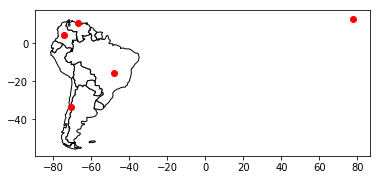

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [0]:
world[world['name']=='United States of America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


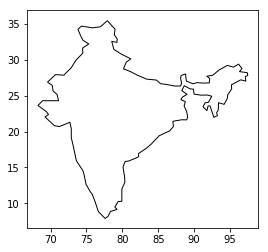

In [0]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'India'].plot(
    color='white', edgecolor='black')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!ls -l "drive/My Drive/MSPA/Predict 455/"

total 163
-rw------- 1 root root 166595 May 23 00:42 states_21basic.zip


In [38]:
!unzip "drive/My Drive/MSPA/Predict 455/states_21basic.zip"

Archive:  drive/My Drive/MSPA/Predict 455/states_21basic.zip
replace states.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: states.dbf              
replace states.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: states.prj              
replace states.sbn? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: states.sbn              
replace states.sbx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: states.sbx              
replace states.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: states.shp              
replace states.shp.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: states.shp.xml          
replace states.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: states.shx              


In [0]:
usa = gpd.read_file("states.shp")

In [0]:
USA_Mainland=usa[((usa['STATE_NAME'] != 'Alaska') & (usa['STATE_NAME'] != 'Hawaii'))]

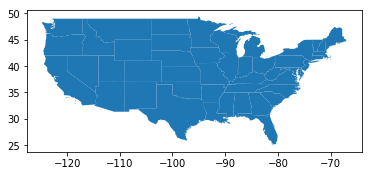

In [41]:
USA_Mainland.plot()

In [42]:
COLA_2018.head()

,State,Rank,Index,Grocery,Housing,Transportation,Utilities,Health Care,Misc
0,Mississippi,1,85.7,91.4,70.8,91.6,90.6,91.4,94.2
1,Oklahoma,2,88.1,92.5,74.6,92.7,95.7,95.4,95.5
2,Arkansas,3,88.4,96.5,76.4,90.9,91.1,85.9,91.2
3,Missouri,4,88.8,93.0,73.5,93.8,99.5,98.0,98.0
4,Michigan,5,89.3,94.6,78.0,101.0,96.6,92.8,85.9


In [0]:
merged = usa[((usa['STATE_NAME'] != 'Alaska') & (usa['STATE_NAME'] != 'Hawaii'))].merge(COLA_2018, left_on='STATE_NAME', right_on='State')

In [44]:
merged[['State', 'Index']].head()

,State,Index
0,Washington,109.5
1,Montana,104.0
2,Maine,117.2
3,North Dakota,98.7
4,South Dakota,98.5


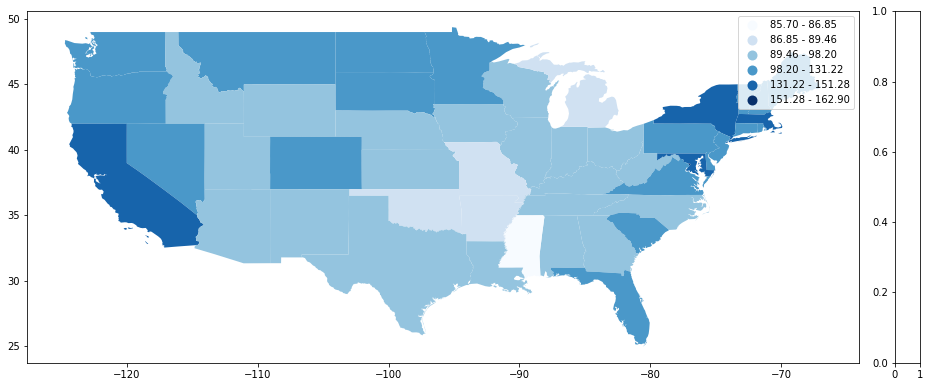

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap = 'Blues'
figsize = (16, 10)
fig, ax = plt.subplots(figsize  = (16, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5)

#ax = 
merged.dropna().plot(column='Index', ax=ax, cmap=cmap, figsize=figsize, scheme='percentiles', k=14, legend=True, cax=cax)



#ax.legend(loc='lower right', frameon=False)

In [0]:
cax

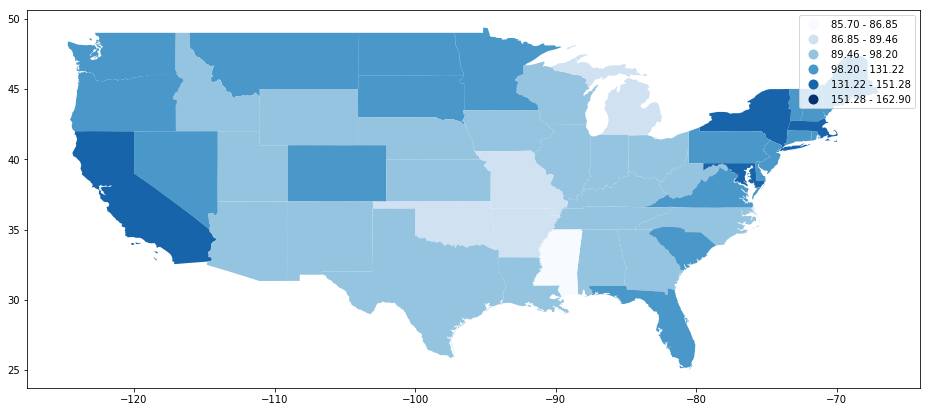

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap = 'Blues'
figsize = (16, 14)


ax = merged.dropna().plot(column='Index', cmap=cmap, figsize=figsize, scheme='percentiles', k=14, legend=True)
ax.set_aspect('equal')

In [0]:
gdf

,City,2018 Minimum Wage per hour,Latitude,Longitude,Code,geometry
0,"Washington, D.C.",13.25,38.907192,-77.036873,DC,POINT (-77.036873 38.90719199999999)
1,Los Angeles,13.25,34.052238,-118.243340,LAX,POINT (-118.24334 34.052238)
2,San Francisco,15.00,37.774929,-122.419418,SFO,POINT (-122.419418 37.774929)
3,New York,13.00,40.712776,-74.005974,NYC,POINT (-74.00597399999999 40.712776)
4,Seattle,15.45,47.606209,-122.332069,SEA,POINT (-122.332069 47.606209)
5,Dallas,7.25,32.776665,-96.796989,DAL,POINT (-96.796989 32.776665)
6,Baltimore,10.10,39.290386,-76.612190,BAL,POINT (-76.61219 39.290386)
7,Miami,10.31,25.761681,-80.191788,MIA,POINT (-80.191788 25.761681)
8,Atlanta,14.00,33.748997,-84.387985,ATL,POINT (-84.387985 33.748997)
9,Boston,12.00,42.360081,-71.058884,BOS,POINT (-71.05888399999999 42.360081)


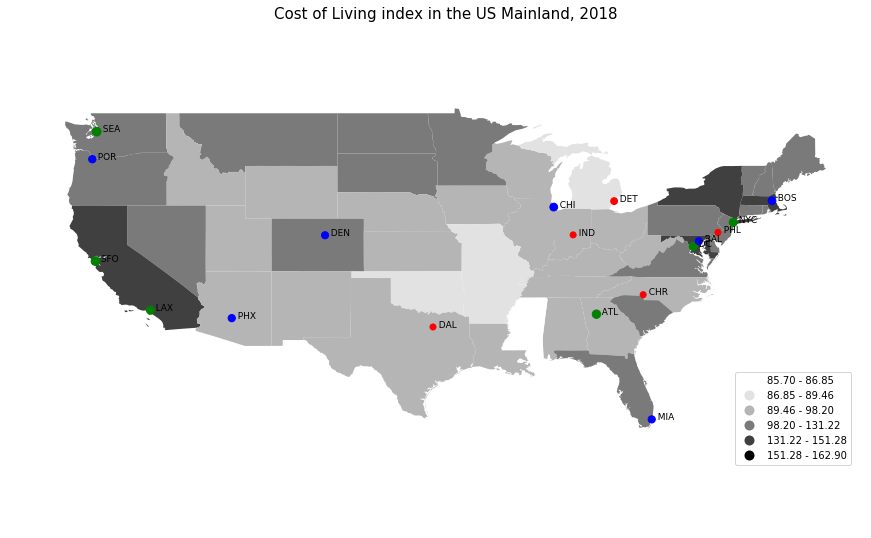

In [0]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap = 'Greys'
fig, ax = plt.subplots(figsize  = (15,9))

bounds = [6.0,10.0,13.0,16.0]
colors = ["r", "b", "g"]

cmap1 = matplotlib.colors.ListedColormap(colors)
norm1 = matplotlib.colors.BoundaryNorm(bounds, cmap1.N)

city_code=gdf['Code']

merged.plot(column='Index', ax = ax, cmap=cmap, figsize=figsize, scheme='percentiles', k=14, legend=True, legend_kwds={'loc': 'lower right'})
pl = gdf.plot(ax=ax, column='2018 Minimum Wage per hour', markersize=(gdf['2018 Minimum Wage per hour']*5), cmap=cmap1, norm=norm1)

ax.set_aspect('equal')
plt.ylim([24, 51])
ax.set_axis_off()
ax.set_title("Cost of Living index in the US Mainland, 2018", fontsize=15)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.79, 0.09, 0.2, 0.2))

for i, txt in enumerate(city_code):
  plt.annotate('  '+txt, (gdf['Longitude'].tolist()[i], gdf['Latitude'].tolist()[i]), fontsize=9)

#green_patch = mpatches.Patch(color='g', label='\$13 - $16')
#blue_patch = mpatches.Patch(color='b', label='\$10 - $13')
#red_patch = mpatches.Patch(color='r', label='\$6 - $10')

#first_legend = plt.legend(handles=[green_patch, blue_patch, red_patch], loc='best')
#ax1 = plt.gca().add_artist(first_legend)


plt.axis('equal');

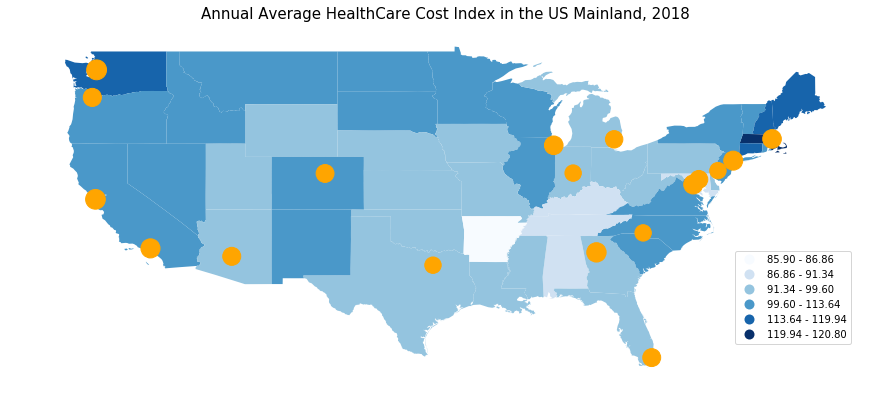

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap = 'Blues'
fig, ax = plt.subplots(figsize  = (15,9))


merged.plot(column='Health Care', ax = ax, cmap=cmap, figsize=figsize, scheme='percentiles', k=14, legend=True, legend_kwds={'loc': 'lower right'})
gdf.plot(ax=ax, markersize=np.sqrt(gdf['2018 Minimum Wage per hour']*10000), color='orange')
ax.set_aspect('equal')
plt.ylim([24, 51])
ax.set_axis_off()
ax.set_title("Annual Average HealthCare Cost Index in the US Mainland, 2018", fontsize=15)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.79, 0.09, 0.2, 0.2))
#plt.axis('equal');

In [0]:
gdf = gpd.GeoDataFrame(
    Min_Wage_2018, geometry=gpd.points_from_xy(Min_Wage_2018.Longitude, Min_Wage_2018.Latitude))

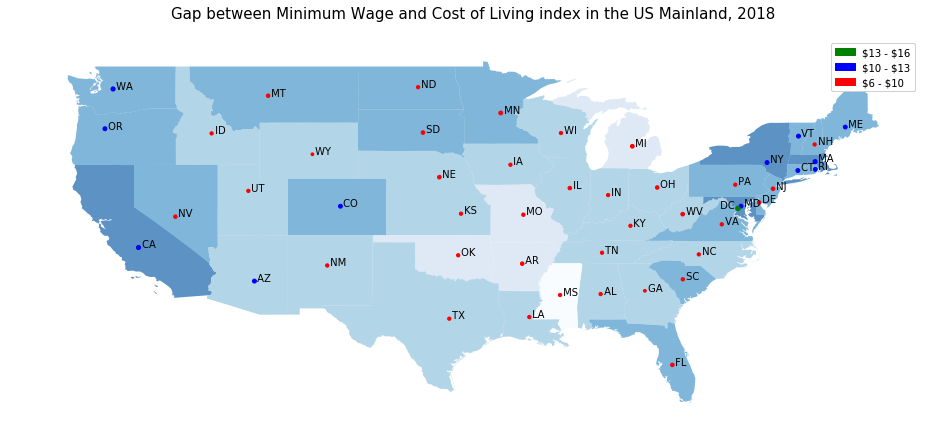

In [151]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20
cmap = 'Blues'
figsize  = (16,10)
fig, ax = plt.subplots(figsize  = (16,10))

bounds = [6.0,10.0,13.0,16.0]
colors = ["r", "b", "g"]

cmap1 = matplotlib.colors.ListedColormap(colors)
norm1 = matplotlib.colors.BoundaryNorm(bounds, cmap1.N)

wage_fig=gdf['2018 Minimum Wage per hour']
st_cd_fig=gdf['Code']

merged.plot(column='Index', ax = ax, cmap=cmap, alpha=0.7, figsize=figsize, scheme='percentiles', k=6, legend=True, legend_kwds={'loc': 'lower right'})
pl = gdf.plot(ax=ax, column='2018 Minimum Wage per hour'
              , markersize=(gdf['2018 Minimum Wage per hour']*1.5)
              , marker='o'
              , cmap=cmap1, norm=norm1)

ax.set_aspect('equal')
plt.ylim([24, 51])
ax.set_axis_off()
ax.set_title("Gap between Minimum Wage and Cost of Living index in the US Mainland, 2018", fontsize=15)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.79, 0.09, 0.2, 0.2))

#for i, txt in enumerate(wage_fig):
#  plt.annotate(' $'+str(txt), (gdf['Longitude'].tolist()[i], gdf['Latitude'].tolist()[i]), fontsize=10)

for i, txt in enumerate(st_cd_fig):
  if txt=='DC':
    #txt==''
    plt.annotate(' '+str(txt)
                 , (gdf['Longitude'].tolist()[i], gdf['Latitude'].tolist()[i])
                 , xytext=(gdf['Longitude'].tolist()[i]-1.5, gdf['Latitude'].tolist()[i])
                 ,fontsize=10)
  else:
    plt.annotate(' '+str(txt), (gdf['Longitude'].tolist()[i], gdf['Latitude'].tolist()[i]), fontsize=10)

#green_patch = mpatches.Patch(color='g', label='\$13 - $16')
#blue_patch = mpatches.Patch(color='b', label='\$10 - $13')
#red_patch = mpatches.Patch(color='r', label='\$6 - $10')

#first_legend = plt.legend(handles=[green_patch, blue_patch, red_patch], loc='best')
#ax1 = plt.gca().add_artist(first_legend)



#plt.axis('equal');

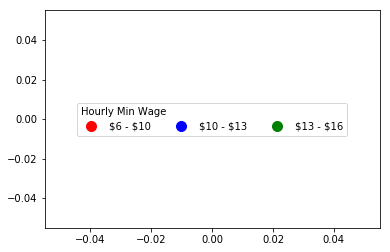

In [152]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
colors = ["r", "b", "g"]
texts = ["\$6 - $10", "\$10 - $13", "\$13 - $16"]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
leg1=plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
           loc='center', ncol=3, numpoints=1, title="Hourly Min Wage" )
leg1._legend_box.align = "left"

#plt.show()